## 1. Maps and Dictionaries

Dictionary:
    - unique keys a re mapped to assiciated values

Dictionary are commonly known as associative arrays or **maps**

### 1.1 The Map ADT

#### The most significant five behaviors:

1. M[k]:
    - Return the value v associated with key k in map M, if one exists; otherwise raise a KeyError. 
    - In Python, this is implemented with the special method    \__getitem__    
2. M[k] = v:
    - Associate value v with key k in map M, replacing the existing value if the map already contains an item with key equal to k. 
    - In Python, this is implemented with the special method \__setitem__.
3. del M[k]:
    - Remove from map M the item with key equal to k; if M has no such item, then raise a KeyError. 
    - In Python, this is implemented with the special method    \__delitem__   
4. len(M): 
    - Return the number of items in map M. 
    - In Python, this is implemented with the special method\__len__.
5. iter(M):
    - The default iteration for a map generates a sequence of keys in the map. 
    - In Python, this is implemented with the special method \__iter__, and it allows loops of the form, for k in M.
    
#### map M should also support the following behaviors for convenience:

1. k in M:
    - Return True if the map contains an item with key k. 
    - In Python, this is implemented with the special \__contains__ method.
2. M.get(k, d = None):
    - Return M[k] if key k exists in the map; otherwise return default value d. 
    - This provides a form to query M[k] without risk of a KeyError.
3. M.setdefault(k,d):
    - If key k exists in the map, simply return M[k]; 
    - if key k does not exist, set M[k] = d and return that value.
4. M.pop(k, d = None):
    - Remove the item associated with key k from the map and return its associated value v. 
    - If key k is not in the map, return default value d (or raise KeyError if parameter d is None).
5. M.popitem():
    - Remove an arbitrary key-value pair from the map, and return a (k,v) tuple representing the removed pair. 
    - If map is empty, raise a KeyError.
6. M.clear():
    - Remove all key-value pairs from the map.
7. M.keys():
    - Return a set-like view of all keys of M.
8. M.values():
    - Return a set-like view of all values of M.
9. M.items():
    - Return a set-like view of (k,v) tuples for all entries of M.
10. M.update(M2):
    - Assign M[k] = v for every (k,v) pair in map M2.
11. M == M2:
    - Return True if maps M and M2 have identical key-value associations.
12. M != M2:
    - Return True if maps M and M2 do not have identical key- value associations.

### 1.2 Application: Count Word Frequencies

In [8]:
filename = '10.1WordFrequenceCount.txt'
freq = {}
for piece in open(filename).read().lower().split():
    word = ''.join(c for c in piece if c.isalpha())
    if word: # require at least one alphabetic character
        freq[word] = 1 + freq.get(word,0)
        
max_word = ''
max_count = 0
for (w,c) in freq.items():
    if c > max_count:
        max_word = w
        max_count = c
print('The most frequent word is: ' , max_word) 
print('Its number of occurrences is: ' , max_count)

The most frequent word is:  the
Its number of occurrences is:  11


### 1.3 Python's MutableMapping Abstract Base Class

The concrete behaviors can be dderived from the five core abstractions methods.

In [10]:
def __contains__(self, k):
    try:
        self[k]
        return True
    except KeyError:
        return False

In [11]:
def setdefault(self, k, d):
    try:
        return self[k]
    except KeyError:
        self[k] = d
        return d

### 1.4 MapBase Class

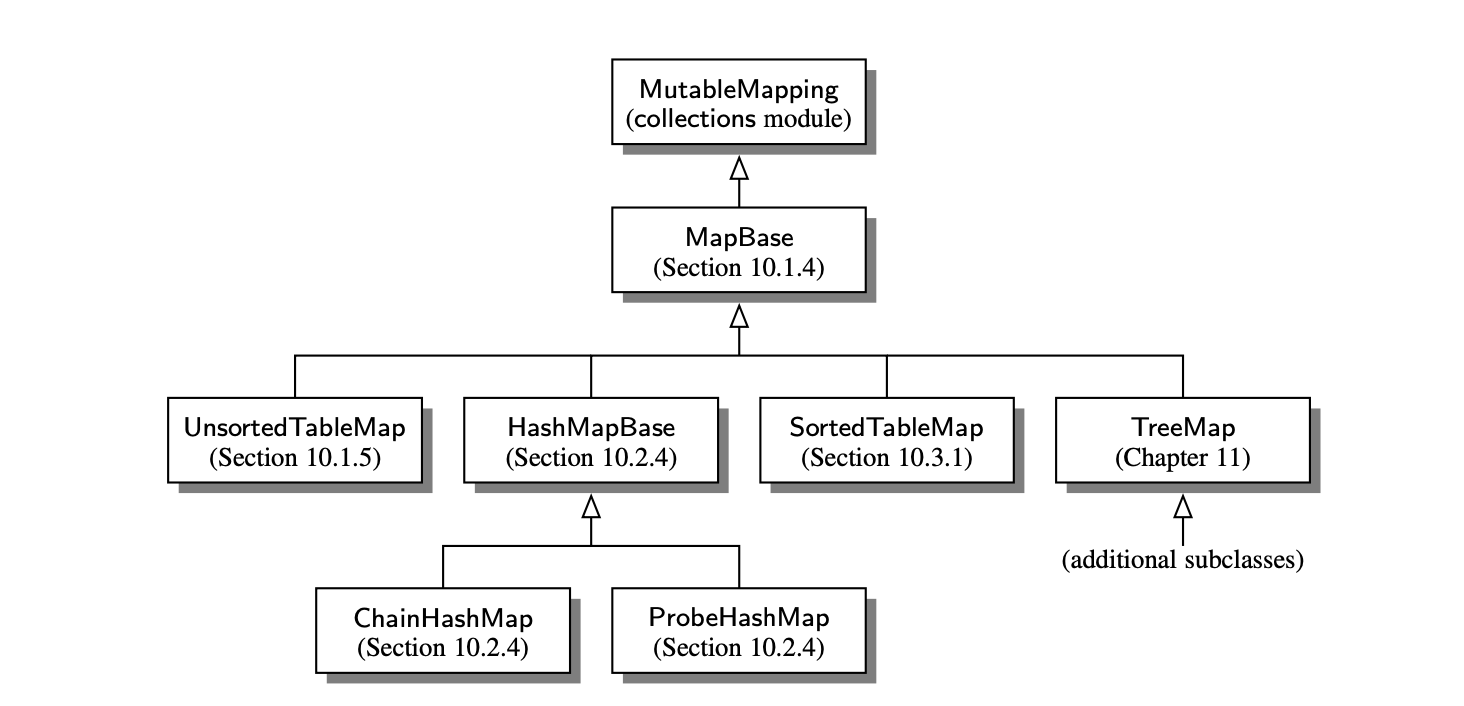

In [14]:
from collections.abc import MutableMapping
class MapBase(MutableMapping):
    #--------------------Nested Item Class-----------------------------
    class _Item:
        __slots__ = '_key','_value'
        
        def __init__(self, k, v):
            self._key = k
            self._value = v
            
        def __eq__(self, other):
            return self._key == other._key
        
        def __ne__(self, other):
            return not (self == other)
        
        def __lt__(self, other):
            return self._key < other._key

### 1.5 Simple Unsorted Map Implementation

Simple but not efficient


Each methods runs in O(n) time on a map with n items

In [16]:
class UnsortedTableMap(MapBase):
    '''
    Map Implementation using an unordered list
    '''
    def __init__(self):
        self._table = []
        
    def __getitem__(self, k):
        for item in self._table:
            if k == item._key:
                return item._value
        raise KeyError('Key Error: '+ repr(k))
        
    def __setitem__(self, k,v):
        for item in self._table:
            if k == item._key:
                item._value = v
                return
        self._table.append(self._Item(k,v))
        
    def __delitem__(self, k):
        for j in range(len(self._table)):
            if k == self._table[j]._key:
                self._table.pop(j)
                return
        raise KeyError('Key Error: '+ repr(k))
        
    def __len__(self):
        return len(self._table)
    
    def __iter__(self):
        for item in self._table:
            yield item._key

## 2. Hash Tables

Use a **hash function** to map general keys to corresponding indices in a table.

There ma be two or more distinct keys get mapped to the same index.
    - Bucket array
    
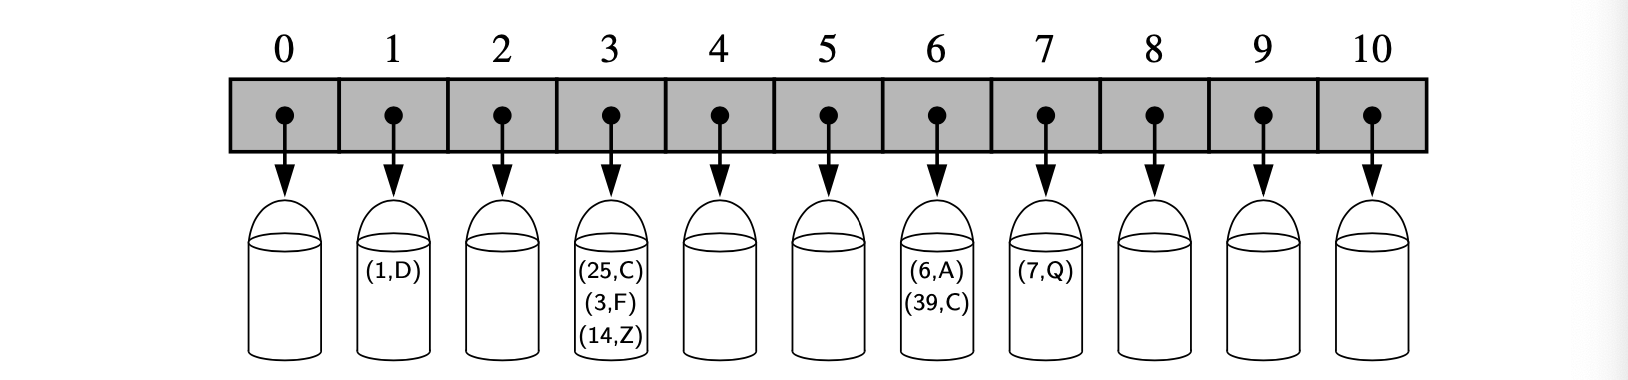

### 2.1 Hash Functions

Hash function:
    - Map each key k to an integer in the range [0, N-1]
    - Where N is the capacity of the bucket array for a hash table.
    
Collision:
    - IF there are two or more keys with the same hash value.
    
A hash function, can be viewed as consisting of two portions:

1. Hash code
    - Maps a key k to an integer
2. Compression function
    - Maps the hash code to an integer within a range of indices
    - Only the compression function depends upon the table size N
    
### Hash Codes

Avoid Collisions as much as possible

#### Treating the Bit Representation as an Integer

For data type X that is represented using at most as many bits as integer hash codes:
    - Take as a hash code for X an integer interpretation of its bits
    - key 314: hash code 314

For a type whose bit representation is longer than a desired hash code, 64-bit data type to 32-bit hash code
    - Combine the high-order and low-order portions of a 64-bit key to form a 32-bit hash code.
        - Add the two components
        - Take the exclusive-or of the two components
        
#### Polynomial Hash Codes

For character string or other variable-length objects
    - that can be viewed as tuple of the form(X0,X1,X2,...,Xn-1) where the order of the Xi's is significant.
    - 'stop', 'pots','tops','spot' can cause collide
    
Choose a nonzero constant a, (a != 1):
<br><br>
$$x_0a^{n-1}+x_1a^{n-2}+x_2a^{n-3}+...+x_{n-2}a+x_{n-1}$$
<br>
The resulting hash code will overflow the bits for an integer:
    - Ignore since care more about a good spread
Experimental Studies:
    - 33,37,39,41 good for english words
    
#### Cyclic-Shift Hash Codes

Clyclic Shift of a partial sum by a certain number of bits.

For example, a 5-bit cyclic shift of the 32-bit value:
    - 00111101100101101010100010101000
    Taking the leftmost 5 bits and placing those on the rightmost side
    - 10110010110101010001010100000111.
    
Experimental Studies:
    - 5-bit shift for english words

In [46]:
def hash_code(s):
    # limit to 32-bit integers
    mask = (1 << 32) - 1
    h = 0
    for character in s:
        # 5-bit shift of running sum
        h = (h << 5 & mask) | (h >> 27)
        # add in value of next character
        h += ord(character)
    return h

#### Hash Codes in Python

Built-in function hash(x) for **immutable** data types
    - Ensure that a particular object's hash code remains constant during that object's lifespan.
    - int, float, str, tuple, frozenset
    
Hash code for

1. string
   - polynomial hash codes using exclusive-or computation
2. tuple
    - combination of the polynomial hash codes of the individual element
3. frozenset
    - Compute the exclusive-or of the individual hash codes without any shifting
    
Hash code for user-defined class:
    - Can be implemented by the method __hash__ for immutable attributes

### Compression Functions

Minimize the number of collisions for a given set of distinct hash codes.

#### The Division Method

hash code mod N
    - Where N is the size of the bucket array
    
Using prime number of N to avoid collisions

#### The MAD Method

Multiply-Add-and-Divide
    - Eliminate repeated patterns
    - The probability any two different keys collide is 1/N
$$[(ai + b)\;\; \text{mod} \;\;p] \;\;\text{mod} \;\;N$$
<br>
Where:
    - N is the size of the bucket array
    - p is a prime number larger than N
    - a and b are integers chosen at random from [0, p-1] with a > 0

### 2.2 Collision-Handling Schemes

#### Separate Chaining

Have each bucket A[j] store its own secondary container, holding items (k, v) such that h(k) = j

Operations on an individual bucket take time proportional to the size of the bucket. O(n/N)

load factor = n/N, preferably below 1

*Disadvantages*:
        - Requires the use of an auxiliary data structure
        - Not preferable when space is a premium

#### Opean Addressing

    The load factor is always at most 1.
    Items are stored directly in the cells of the bucket array itself
    
1. Linear Probing
    - If a bucket is already occupied, next try 
    $$A[(j+1) mod N]$$ and so on
    - Until find an empty bucket
    
When searchinng for an existing key:
    - must examine consecutive slots
    - Untile find the expected item or an empty bucket
When implement a deletion
    - Replace a deleted item with a special available marker object
    
*Disadvantages*:
        - tends to cluster the items of a map into contiguous runs
        
2. Quadratic Probing
    - If a bucket is already occupied, next try 
$$A[(h(k) + f(i)) mod N]$$ for i = 0,1,2, where f(i) = i^2
    
*Disadvantages*:
    - Secondary clustering
    - Guaranteed to find an empty slot when N is prime and the bucket array is less than half full
    
3. Double Hashing
    - Use a secondary hash function h'
    $$A[(h(k) + f(i)) mod N]$$
    where f(i) = i * h'(k)
    - No clustering
    
4. Pseudo-Randome number
    $$A[(h(k) + f(i)) mod N]$$
    Where f(i) is based on a pseudo-random number generator, providing a repeatable arbitrary sequence of probes.
    - Used by Python's dictionary class

### 2.3 Load Factors, Rehashing, and Efficiency

#### Load Factor

1. Separate chaining:
    - Should maintain the load factor < 0.9
2. Open Addressing:
    - Linear probing: < 0.5
    - Python: < 2/3

#### Rehashing

If an insertion causes the load factor of a hash table to go above the threshold
    - resize the table
    - Reinsert all object into the new table
    - reapply a new compression function
    - At least double the previous size
    
#### Efficiency

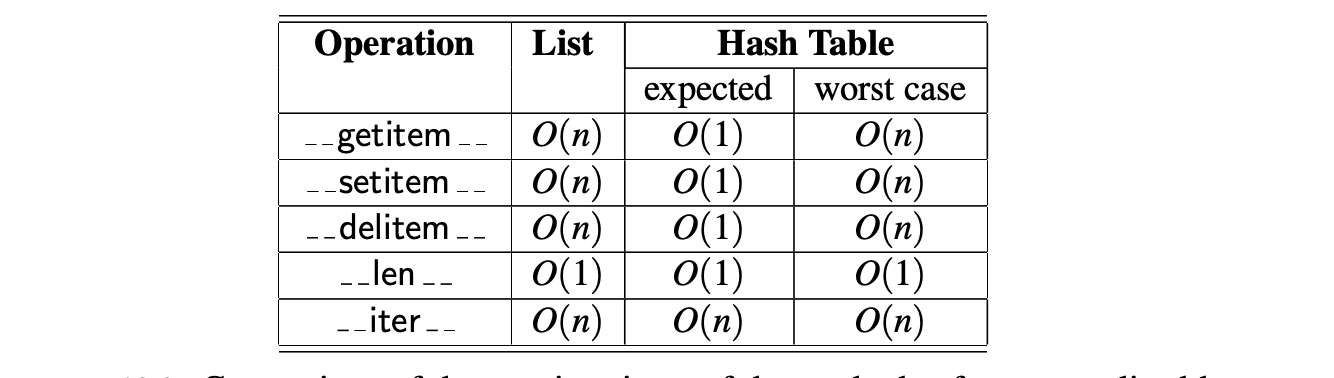

### 2.4 Python Hash Table Implementation

#### MapBase

Using Python's built-in hash function, and a randomized MAD formula for the compression function

In [48]:
class HashMapBase(MapBase):
    '''
    Abstract base class for map using hash-table with MAD compression
    '''
    def __init__(self, cap = 11, p = 109345121):
        self._table = cap * [None]
        # number of entries in the map
        self._n = 0
        # prime for MAD compression
        self._prime = p
        # scale from 1 to p-1 for MAD
        self._scale = 1 + randrange(p-1)
        # shift from 0 to p-1 for MAD
        self._shift = randrange(p)
        
    def _hash_function(self, k):
        return (hash(k)*self._scale + self._shift) % self._prime % len(self._table)
    
    def __len__(self):
        return self._n
    
    def __getitem__(self, k):
        j = self._hash_function(k)
        # may raise KeyError
        return self._bucket_getitem(j, k)
    
    def __setitem__(self, k, v):
        j = self._hash_function(k)
        self._bucket_setitem(j, k, v)
        # keep load factor <= 0.5
        if self._n > len(self._table) // 2:
            self._resize(2 * len(self._table) - 1)
            
    def __delitem__(self, k):
        j = self._hash_function(k)
        self._bucket_delitem(j, k)
        self._n -= 1
        
    def _resize(self, c):
        old = list(self.items())
        self._table = c * [None]
        self._n = 0
        for (k,v) in old:
            self[k] = v

#### Seperate Chaining

Using an instance of the UnsortedTableMap class to represent a single bucket

In [49]:
class ChainHashMap(HashMapBase):
    '''
    Hash map implemented with separate chaining for collision resolution
    '''
    def _bucket_getitem(self, j, k):
        bucket = self._table[j]
        if bucket is None:
            raise KeyError('Key Error: ' + repr(k))
        return bucket[k]
    
    def _bucket_setitem(self, j, k, v):
        if self._table[j] is None:
            self._table[j] = UnsortedTableMap()
        oldsize = len(self._table[j])
        self._table[j][k] = v
        # key is new to the table
        if len(self._table[j]) > oldsize:
            self._n += 1
            
    def _bucket_delitem(self, j, k):
        bucket = self._table[j]
        if bucket is None:
            raise KeyError('Key Error: ' + repr(k))
        # may raise keyerror
        del bucket[k]
        
    def __iter__(self):
        for bucket in self._table:
            if bucket is not None:
                for key in bucket:
                    yield key

#### Linear Probing

In [51]:
class ProbeHashMap(HashMapBase):
    '''
    Hash map implemented with linear probing for collision resolution
    '''
    # sentinal marks locations of previous deletion
    _AVAIL = object()
    
    def _is_available(self, j):
        '''
        Return True if index j is available in table
        '''
        return self._table[j] is None or self._table[j] is ProbeHashMap._AVAIL
    
    def _find_slot(self, j, k):
        '''
        Search for key k in bucket at index j
        
        Return (success, index) tuple
        If match is found, success if True and index denotes its location
        If not, success is False and index denoes first available slot
        '''
        firstAvail = None
        while True:
            if self._is_available(j):
                if firstAvail is None:
                    firstAvail = j
                if self._table[j] is None:
                    return (False, firstAvail)
            elif k == self._table[j]._key:
                return (True, j)
            j = (j+1)%len(self._table)
            
    def _bucket_getitem(self, j, k):
        found, s= self._find_slot(j,k)
        if not found:
            raise KeyError('Key Error: ' + repr(k))
        return self._table[s]._value
    
    def _bucket_setitem(self, j, k, v):
        found,s = self._find_slot(j, k)
        if not found:
            self._table[s] = self._Item(k,v)
            self._n += 1
        else:
            self._table[s]._value = v
            
    def _bucket_delitem(self, j, k):
        found, s= self._find_slot(j,k)
        if not found:
            raise KeyError('Key Error: ' + repr(k))
        self._table[s] = ProbeHashMap._AVAIL
        
    def __iter__(self):
        for j in range(len(self._table)):
            if not self._is_available(j):
                yield self._table[j]._key

## 3. Sorted Maps

Sorted Map ADT
    - Include all behaviors of the standard map
    - plus the following:
    
1. M.find_min()
2. M.find_max()
3. M.find_It(k)
    - Return the (key,value) pair with the greatest key that is strictly less than k 
    - or None, if no such item exists
4. M.find_le(k)
    - Return the (key,value) pair with the greatest key that is less than or equal to k 
    - or None, if no such item exists.
5. M.find_gt(k)
    - Return the (key,value) pair with the least key that is strictly greater than k 
    - or None, if no such item exists.
6. M.find_ge(k)
7. M.find_range(start, stop)
    - Iterate all (key,value) pairs with start <= key < stop. 
    - If start is None, iteration begins with minimum key; if stop is None, iteration concludes with maximum key.
10. iter(M)
    - Iterate all keys of the map according to their natural order, from smallest to largest.
11. reversed(M)
    - Iterate all keys of the map in reverse order; 
    - in Python, this is implemented with the \__reversed__method.

### 3.1 Sorted Search Tables

Store the map's item in an array-based sequence A so that they are in increasing order of their keys.

In [52]:
class SortedTableMap(MapBase):
    '''
    Map Implementation using a sorted table
    '''
    
    #--------------------------nonpublic behaviors---------------------
    def _find_index(self, k, low, high):
        '''
        Return index of the leftmost item with key greater than or equal to k
        
        Return high+1 if no such item qualifies.
        
        J will be returned such that:
        all items of slice table[low:j] have key < k
        all items of slice table[j:high+1] have key >= k
        '''
        if high < low:
            return high + 1
        else:
            mid = (low + high) // 2
            if k == self._table[mid]._key:
                return mid
            elif k < self._table[mid]._key:
                return self._find_index(k, low, mid-1)
            else:
                return self._find_index(k, mid+1, high)
            
    #-------------------public behaviors-------------------------------
    def __init__(self):
        self._table = []
        
    def __len__(self):
        return len(self._table)
    
    def __getitem__(self, k):
        j = self._find_index(k, 0, len(self._table)-1)
        if j == len(self._table) or self._table[j]._key != k:
            raise KeyError('Key Error: ' + repr(k))
        return self._table[j]._value
    
    def __setitem__(self, k, v):
        j = self._find_index(k, 0, len(self._table)-1)
        if j < len(self._table) and self._table[j]._key == k:
            self._table[j]._value = v
        else:
            self._table.insert(j, self._Item(k,v))
            
    def __delitem__(self, k):
        j = self._find_index(k, 0, len(self._table)-1)
        if j == len(self._table) or self._table[j]._key != k:
            raise KeyError('Key Error: '+ repr(k))
        self._table.pop(j)
        
    def __iter__(self):
        for item in self._table:
            yield item._key
            
    def __reversed__(self):
        for item in reversed(self._table):
            yield item._key
            
    def find_min(self):
        if len(self._table) > 0:
            return (self._table[0]._key, self._table[0]._value)
        else:
            return None
        
    def find_max(self):
        if len(self._table) > 0:
            return (self._table[-1]._key, self._table[-1]._value)
        else:
            return None
        
    def find_ge(self):
        # greater than or equal to
        j = self._find_index(k, 0, len(self._table) - 1)
        if j < len(self._table):
            return (self._table[j]._key, self._table[j]._value)
        else:
            return None
        
    def find_lt(self,k):
        # less than
        j = self._find_index(k, 0, len(self._table) - 1)
        if j > 0:
            return (self._table[j-1]._key, self._table[j-1]._value)
        else:
            return None
        
    def find_le(self, k):
        # less than or equal to
        j = self._find_index(k, 0, len(self._table) - 1)
        if j > 0 and self._table[j]._key != k:
            return (self._table[j-1]._key, self._table[j-1]._value)
        if self._table[j]._key == k:
            return (self._table[j]._key, self._table[j]._value)
        return None
        
    def find_gt(self, k):
        # greater than
        j = self._find_index(k, 0, len(self._table) - 1)
        if j < len(self._table) and self._table[j]._key == k:
            j += 1
        if j < len(self._table):
            return (self._table[j]._key, self._table[j]._value)
        else:
            return None
        
    def find_range(self, start, stop):
        # start <= key < stop
        if start is None:
            j = 0
        else:
            j = self._find_index(start, 0, len(self._table) - 1)
        while j < len(self._table) and (stop is None or self._table[j]._key < stop):
            yield (self._table[j]._key, self._table[j]._value)
            j += 1

#### Analysis

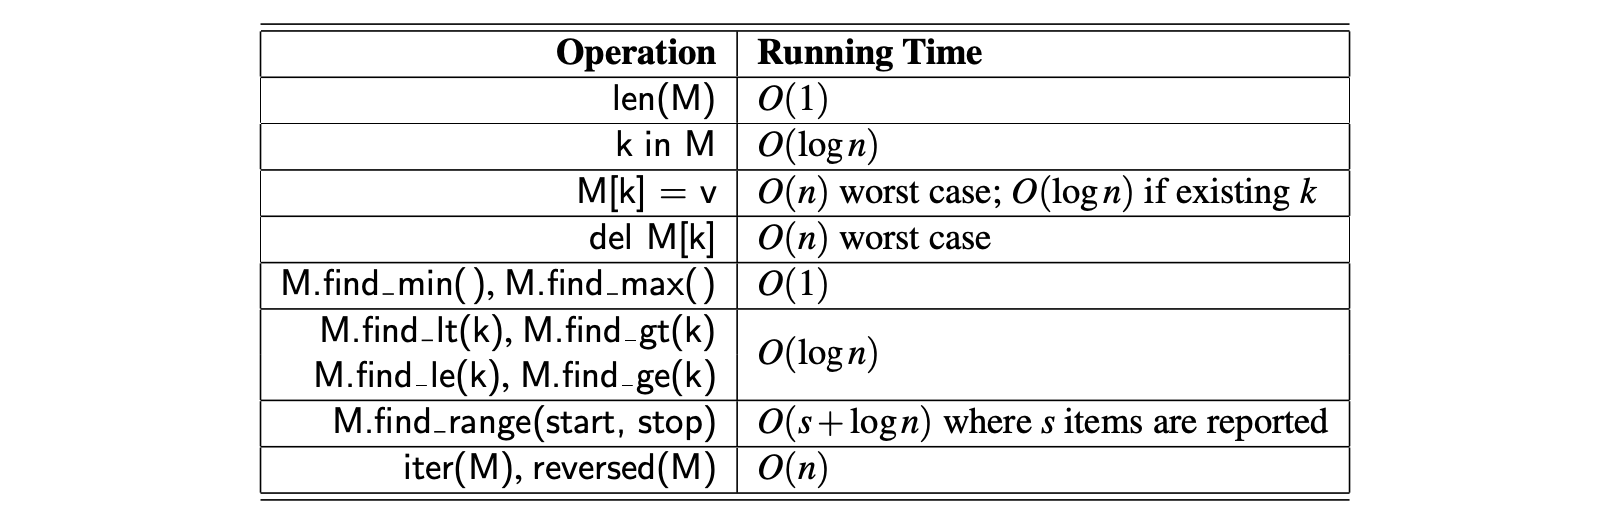

### 3.2 Two Applications of Sorted Maps

1. Flight Databases
2. Maxima Sets

In [53]:
class CostPerformanceDatabase:
    '''
    Maintain a database of maximal(cost, performance) pairs
    '''
    def __init__(self):
        self._M = SortedTableMap()
        
    def best(self, c):
        '''
        Return (cost, performance) pair with largest cost not exceeding c
        '''
        return self._M.find_le(c)
    
    def add(self, c, p):
        '''
        Add new entry with cost c and performance p
        '''
        other = self._M.find_le(c)
        # added item not dominated, ignore
        if other is not None and other[1] >= p:
            return 
        self._M[c] = p
        other = self._M.find_gt(c)
        while other is not None and other[1] <= p:
            del self._M[other[0]]
            other = self._M.find_gt(c)

## 4. Skip Lists

#### Searching in a Skip List

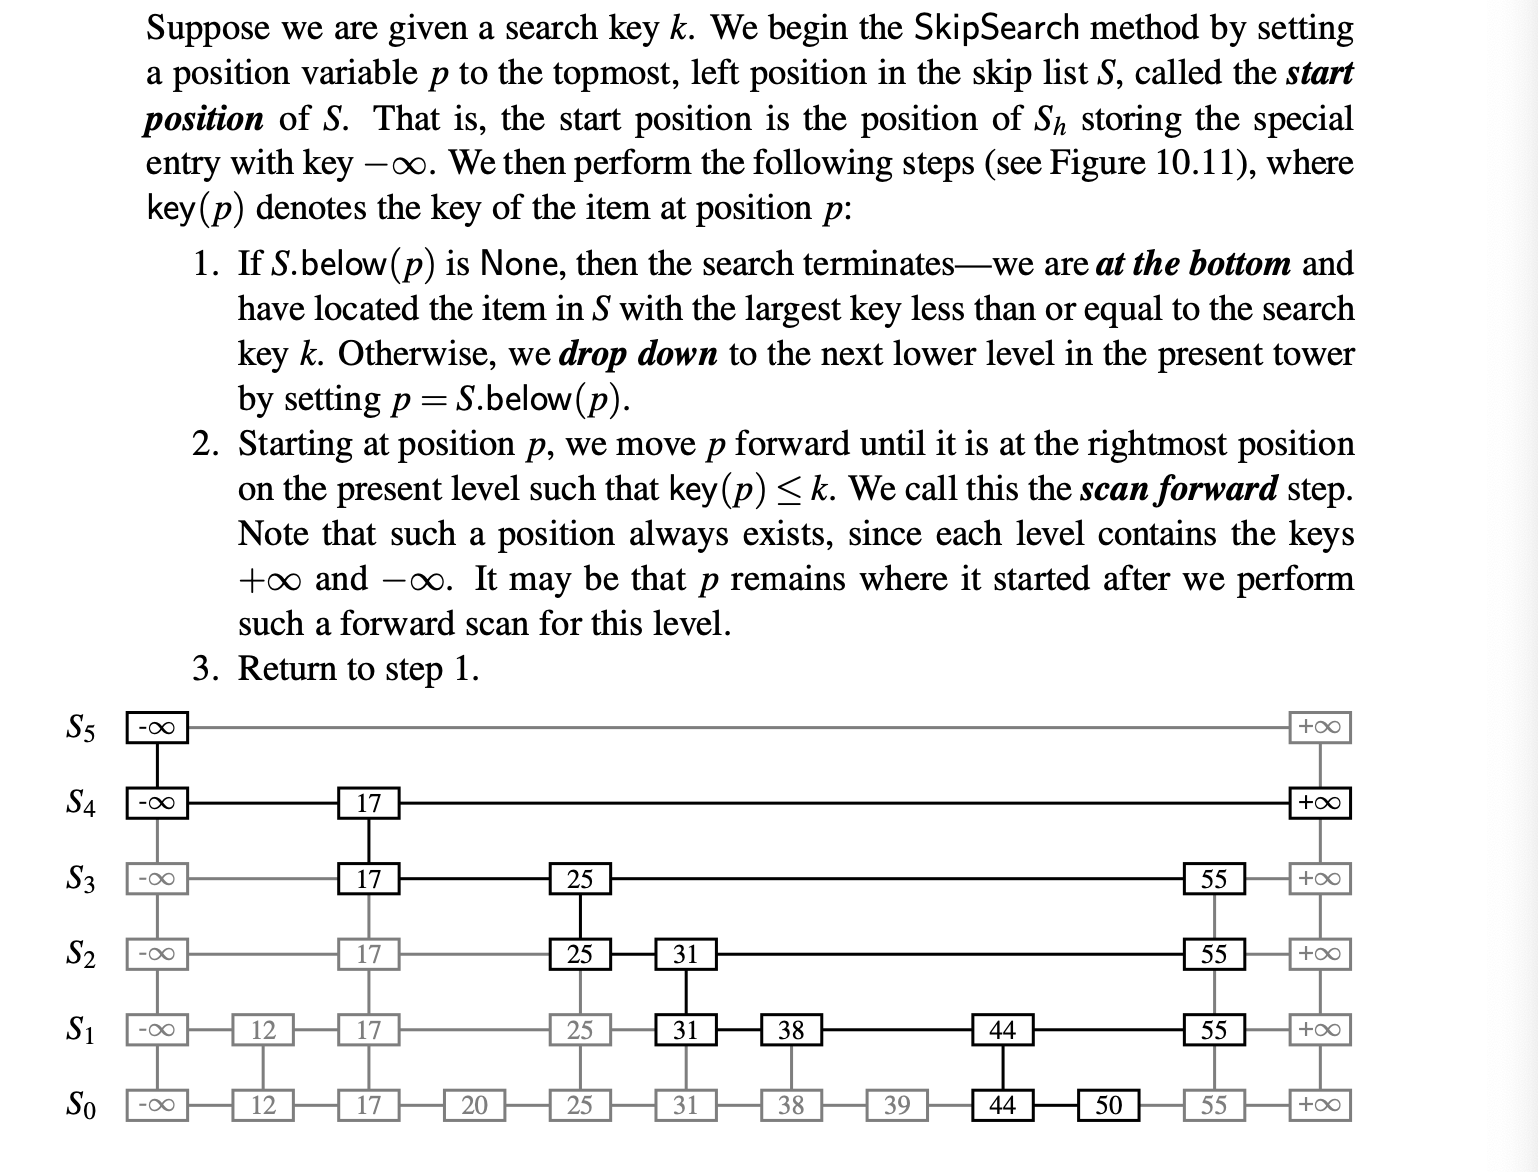

## 5. Sets, Multisets, and Multimaps

### 5.1 The Set ADT

Set:
    - unordered collection of elements, without duplicates, typically support efficient membership tests.
    - In essence, elements of a set are like keys of a map, but without auxiliary values.
    
#### Five most fundamental behaviors for a set S:
1. S.add(e):
    - Add element e to the set. 
    - This has no effect if the set already contains e.
2. S.discard(e):
    - Remove element e from the set, if present. 
    - This has no effect if the set does not contain e.
3. e in S:
    - Return True if the set contains element e. 
    - In Python, this is implemented with the special \__contains__ method.
4. len(S)
5. iter(S)

#### Boolean Comparisons between two sets:
1. S == T:
    - Return True if sets S and T have identical contents.
2. S != T:
    - Return True if sets S and T are not equivalent.
3. S <= T:
    - Return True if set S is a subset of set T.
4. S < T:
    - Return True if set S is a proper subset of set T.
5. S >= T:
    - Return True if set S is a superset of set T.
6. S > T:
    - Return True if set S is a proper superset of set T.
7. S.isdisjoint(T):
    - Return True if sets S and T have no common elements.
    
#### Set Theory Operations:
1. S | T:
    - Return a new set representing the union of sets S and T.
2. S |= T:
    - Update set S to be the union of S and set T
3. S & T:
    - Return a new set representing the intersection of sets S and T.
4. S &= T:
    - Update set S to be the intersection of S and set T.
5. S ^ T:
    - Return a new set representing the symmetric difference of sets S and T
    - That is, a set of elements that are in precisely one of S or T.
6. S ^= T:
    - Update set S to become the symmetric difference of itself and set T.
7. S - T:
    - Return a new set containing elements in S but not T.
8. S -= T:
    - Update set S to remove all common elements with set T.

### 5.2 Python's MutableSet Abstract Base Class

Syntax S < T

In [54]:
def __lt__(self, other):
    '''
    Return True if this set is a proper subset of other
    '''
    if len(self) >= len(other):
        return False
    for e in self:
        if e not in other:
            return False
    return True

Syntax S | T

In [55]:
def __or__(self, other):
    '''
    Return a new set that is the union of two existing sets
    '''
    result = type(self)()
    for e in self:
        result.add(e)
    for e in other:
        result.add(e)
    return result

In-place version of a union supports syntax S |= T

In [56]:
def __ior__(self, other):
    for e in other:
        self.add(e)
    return self

### 5.3 Implementing Sets, Multisets, and Multimaps

#### Sets

A set is simply a map in which keys do not have associated values.


    Abandon the _Item composite in MapBase class and instead store set element directly in a data structure.

#### Multisets/bag

A set-like container that allows duplicates


    Implement a multiset by using a map in which the map key is a distinct element of the multiset, and the associated value is a count of the number of occurrences of that element within the multiset.

#### Multimaps

The same key can be mapped to multiple values.

    Implemented by using a standard map in which the value associated with a key is a container class storing any number of associated values.

In [57]:
class MultiMap:
    # maptype can be redefined by subclass
    _MapType = dict
    
    def __init__(self):
        self._map = self._MapType()
        self._n = 0
        
    def __iter__(self):
        for k, secondary in self._map.items():
            for v in secondary:
                yield (k,v)
                
    def add(self, k, v):
        container = self._map.setdefault(k, [])
        container.append(v)
        self._n += 1
        
    def pop(self, k):
        secondary = self._map[k]
        v = secondary.pop()
        if len(secondary) == 0:
            del self._map[k]
        self._n -= 1
        return (k,v)
    
    def find(self, k):
        secondary = self._map[k]
        return (k, secondary[0])
    
    def find_all(self, k):
        # empty list by default
        secondary = self._map.get(k,[])
        for v in secondary:
            yield (k,v)